In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(120)
n_samples = 1000
class_0_ratio = 0.9
n_class_0=int(n_samples * class_0_ratio)
print(n_class_0)
n_class_1 = n_samples - n_class_0
print(n_class_1)

900
100


In [26]:
class_0 = pd.DataFrame({
    'f1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'f2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})
class_1 = pd.DataFrame({
    'f1' : np.random.normal(loc = 2 , scale = 1 , size = n_class_1),
    'f2' : np.random.normal( loc= 2 , scale =1 , size = n_class_1),
    'target' : [1] * n_class_1 
})
df = pd.concat([ class_0 , class_1 ]).reset_index(drop = True)
df.tail()
df['target'].value_counts()
df.head()

,f1,f2,target
0,0.927616,-0.108271,0
1,1.475005,0.991333,0
2,-0.052156,-1.138094,0
3,0.990967,-0.522649,0
4,-0.916651,-0.885575,0


In [17]:
df_minority = df[df['target']==1]
df_majority = df[df['target'] == 0]

In [29]:
from sklearn.utils import resample

df_minority_upsampled = resample(
    df_minority,
    replace= True,
    n_samples= len(df_majority),
    random_state = 42
    )
df_minority_upsampled.head()

,f1,f2,target
951,3.216393,0.975524,1
992,2.968680,1.220696,1
914,3.751209,0.807745,1
971,2.948947,0.609174,1
960,2.110971,1.469808,1


In [31]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['target'].value_counts()


target
0    900
1    900
Name: count, dtype: int64

In [36]:
np.random.seed(123)
n = 1000
ratio = 0.9
zero = int(n * ratio)
one = n - zero
cl0 = pd.DataFrame({
    'f1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'f2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})
cl1 = pd.DataFrame({
    'f1' : np.random.normal(loc = 2 , scale = 1 , size = n_class_1),
    'f2' : np.random.normal( loc= 2 , scale =1 , size = n_class_1),
    'target' : [1] * n_class_1 
})
df = pd.concat([cl1, cl0 ]).reset_index(drop = True)
df_min = df[df['target']==1]
df_maj = df[df['target'] == 0]

In [46]:
from sklearn.utils import resample
df_majority_downsample = resample(
     df_maj , 
     replace = False,
     n_samples = len(df_min),
     random_state = 42)
df_majority_downsample = pd.concat([df_majority_downsample , df_min])
print(df_majority_downsample.shape)


(200, 3)


In [47]:
df_majority_downsample['target'].value_counts()


target
0    100
1    100
Name: count, dtype: int64

In [2]:
from sklearn.datasets import make_classification

In [3]:
x , y = make_classification(n_features = 2 , n_samples=1000 , weights = [0.90] , random_state = 43 ,n_redundant = 0 , n_clusters_per_class = 1)

In [13]:
d1 = pd.DataFrame(x , columns =[ 'f1' , 'f2'])
d2 = pd.DataFrame( y , columns =['target'])
df_final = pd.concat([d1 , d2] , axis = 1)
df_final.head()
df_final['target'].value_counts()

target
0    896
1    104
Name: count, dtype: int64

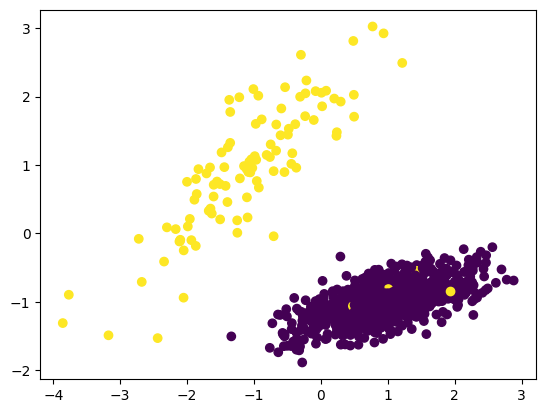

In [15]:
plt.scatter(df_final['f1'],df_final['f2'],c=df_final['target'])

In [16]:
!pip install imblearn


   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ---------------------------------------- 3/3 [imblearn]



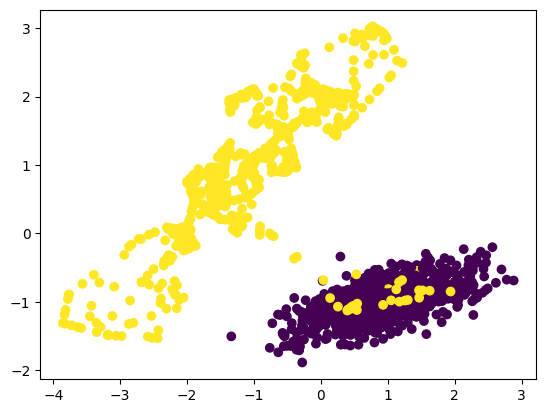

In [18]:
from imblearn.over_sampling import SMOTE 
oversample=SMOTE() 
X,y=oversample.fit_resample(df_final[['f1','f2']],df_final['target']) 

X.head() 

X.shape 

y.shape 

len(y[y==0]) 

len(y[y==1]) 

df1=pd.DataFrame(X,columns=['f1','f2']) 
df2=pd.DataFrame(y,columns=['target']) 
oversample_df=pd.concat([df1,df2],axis=1) 

plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target']) 